# Họ và Tên: Cao Nguyễn Hoàng Huân
# MSSV: 2174802010238

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng median filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Sobel filter để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi thứ tự các kênh màu (ví dụ: BGR → GRB hoặc GBR...) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B, lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm)


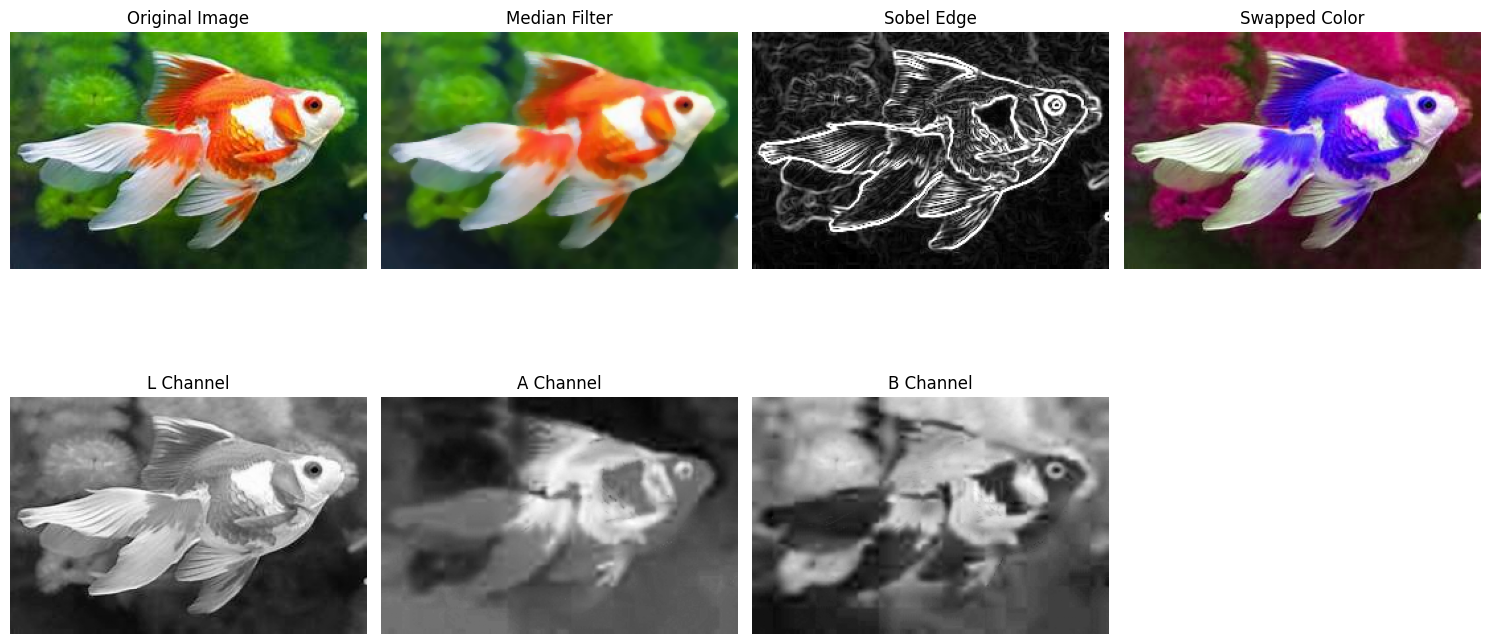

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

image_name = "Ca.jpg"  
img = cv2.imread(image_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
basename = os.path.splitext(image_name)[0]

median_filtered = cv2.medianBlur(img, 5)
cv2.imwrite(f"{basename}_median.jpg", cv2.cvtColor(median_filtered, cv2.COLOR_RGB2BGR))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = cv2.convertScaleAbs(sobel)
cv2.imwrite(f"{basename}_sobel.jpg", sobel)

swapped = img[:, :, [1, 2, 0]]
cv2.imwrite(f"{basename}_swapped.jpg", cv2.cvtColor(swapped, cv2.COLOR_RGB2BGR))

lab = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2LAB)
L, A, B = cv2.split(lab)
cv2.imwrite(f"{basename}_L.jpg", L)
cv2.imwrite(f"{basename}_A.jpg", A)
cv2.imwrite(f"{basename}_B.jpg", B)
titles = ['Original Image', 'Median Filter', 'Sobel Edge', 'Swapped Color', 'L Channel', 'A Channel', 'B Channel']
images = [img, median_filtered, sobel, swapped, L, A, B]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật lọc và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Gaussian Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Median Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Bilateral Filter (tham số ngẫu nhiên) (0.5 điểm)  
* Canny Edge Detection (thresholds ngẫu nhiên 50–150) (0.5 điểm)  
* Erosion (kernel 2x2 đến 5x5 ngẫu nhiên) (0.5 điểm)  
* Dilation (tương tự Erosion) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* B: Gaussian Blur  
* M: Median Blur  
* F: Bilateral Filter  
* E: Canny Edge  
* R: Erosion  
* D: Dilation (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_blur_dog.jpg`, `result_canny_image2.jpg` (0.5 điểm)


Chọn phương pháp xử lý ảnh:
B: Gaussian Blur
M: Median Blur
F: Bilateral Filter
E: Canny Edge Detection
R: Erosion
D: Dilation
 Đã lưu ảnh: output_gaussian_1.jpg


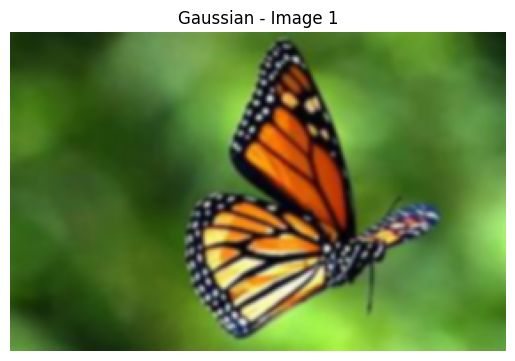

 Đã lưu ảnh: output_gaussian_2.jpg


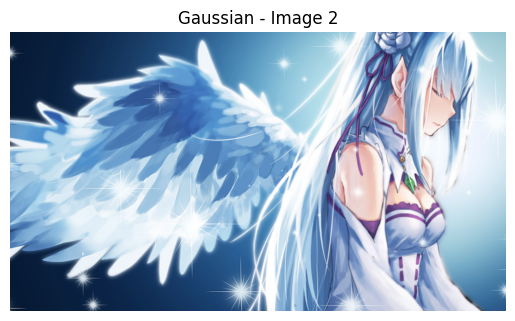

 Đã lưu ảnh: output_gaussian_3.jpg


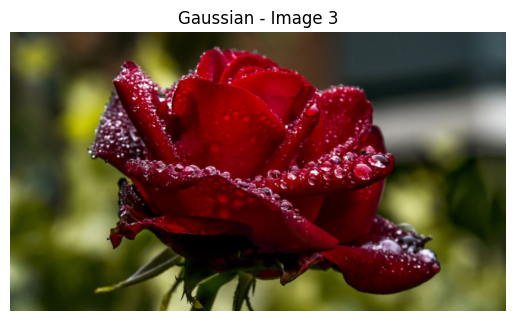

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Danh sách ảnh
image_files = ['image1.jpg', 'image2.jpg', 'image3.jpg']
images = []
for file in image_files:
    if not os.path.exists(file):
        print(f" Không tìm thấy file {file}")
        images.append(None)
    else:
        images.append(cv2.imread(file))



# Các hàm xử lý ảnh
def gaussian_blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

def median_blur(img):
    return cv2.medianBlur(img, 5)

def bilateral_filter(img):
    return cv2.bilateralFilter(img, 9, 75, 75)

def canny_edge(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

def erosion(img):
    kernel = np.ones((3, 3), np.uint8)
    return cv2.erode(img, kernel, iterations=1)

def dilation(img):
    kernel = np.ones((3, 3), np.uint8)
    return cv2.dilate(img, kernel, iterations=1)

# Bản đồ phím - hàm xử lý
operations = {
    'B': ('gaussian', gaussian_blur),
    'M': ('median', median_blur),
    'F': ('bilateral', bilateral_filter),
    'E': ('canny', canny_edge),
    'R': ('erosion', erosion),
    'D': ('dilation', dilation),
}

# In menu
print("Chọn phương pháp xử lý ảnh:")
print("B: Gaussian Blur")
print("M: Median Blur")
print("F: Bilateral Filter")
print("E: Canny Edge Detection")
print("R: Erosion")
print("D: Dilation")

# Nhập lựa chọn
key = input(" Nhập phím theo menu: ").upper()

if key in operations:
    method_name, method_func = operations[key]
    for idx, img in enumerate(images):
        if img is None:
            continue
        result = method_func(img)
        filename = f"output_{method_name}_{idx+1}.jpg"
        cv2.imwrite(filename, result)
        print(f" Đã lưu ảnh: {filename}")
        show_image(result, f"{method_name.capitalize()} - Image {idx+1}")
else:
    print(" Phím không hợp lệ.")
# Hàm hiển thị ảnh bằng matplotlib
def show_image(img, title='Image'):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh. (0.5 điểm)  
* Xoay ảnh thứ hai 135 độ và lật ngang. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba bằng công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.5, 2.0], \quad \beta \in [-50, 50]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


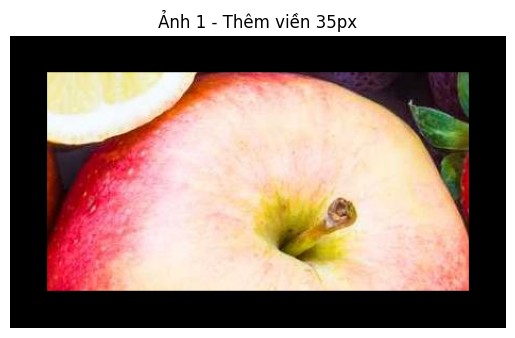

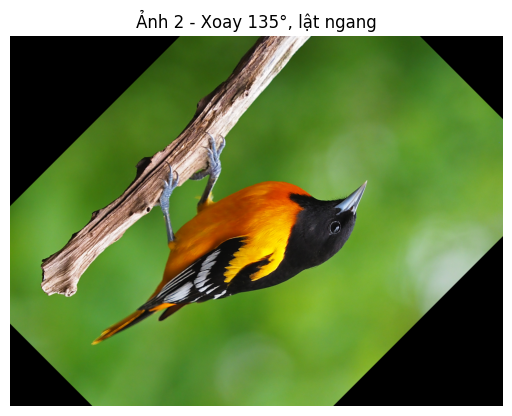

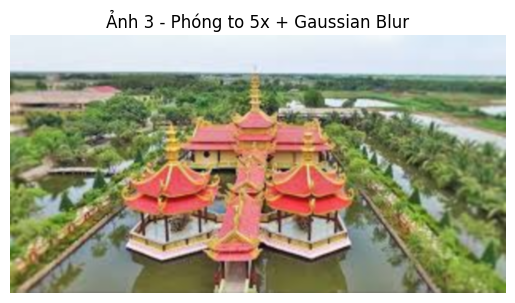

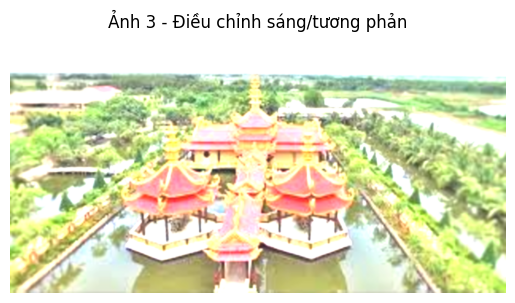

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Đọc ảnh
image_files = ['apple.jpg', 'bird.png', 'chua.jpeg']
images = []
for file in image_files:
    if not os.path.exists(file):
        print(f" Không tìm thấy file {file}")
        images.append(None)
    else:
        images.append(cv2.imread(file))

# 1. Tăng kích thước ảnh đầu tiên thêm 35 pixel mỗi cạnh
if images[0] is not None:
    img1_padded = cv2.copyMakeBorder(images[0], 35, 35, 35, 35, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    cv2.imwrite('output_apple.jpg', img1_padded)
    plt.imshow(cv2.cvtColor(img1_padded, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh 1 - Thêm viền 35px")
    plt.axis('off')
    plt.show()

# 2. Xoay ảnh thứ hai 135 độ và lật ngang 
if images[1] is not None:
    h, w = images[1].shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 135, 1.0)
    rotated = cv2.warpAffine(images[1], M, (w, h))
    flipped = cv2.flip(rotated, 1) 
    cv2.imwrite('output_bird.jpg', flipped)
    plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh 2 - Xoay 135°, lật ngang")
    plt.axis('off')
    plt.show()

# 3. Tăng kích thước ảnh 3 lên 5 lần và làm mịn bằng Gaussian Blur
if images[2] is not None:
    resized = cv2.resize(images[2], None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
    blurred = cv2.GaussianBlur(resized, (9, 9), 0)
    cv2.imwrite('output_chua.jpg', blurred)
    plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh 3 - Phóng to 5x + Gaussian Blur")
    plt.axis('off')
    plt.show()

    # 4. Thay đổi độ sáng và tương phản 
    alpha = 1.5 
    beta = 30  

    adjusted = cv2.convertScaleAbs(blurred, alpha=alpha, beta=beta)
    cv2.imwrite('output_chua_brightness_contrast.jpg', adjusted)
    plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
    plt.title(f"Ảnh 3 - Điều chỉnh sáng")
    plt.axis('off')
    plt.show()


# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.